In [1]:
import numpy as np
import NR_a2_1_utils as utils1
import NR_a2_3_utils as utils3
from matplotlib import pyplot as plt
from importlib import reload
from scipy import stats
reload(utils1)
reload(utils3)
seed = 42
print('Original seed:',seed)
rng = utils1.rng(seed)
from tqdm import tqdm

Original seed: 42


# 3. Linear Structure growth

In [2]:
#reload(utils3)
#ode = lambda y,t : -y
#ode_int = utils3.runge_kutta(0,10,ode,10)
#print(ode_int)
#reload(utils3)
#ode = lambda y,t : -y*t
#ode_int = utils3.runge_kutta(0,10,ode,10)
#print(ode_int)

In [3]:
reload(utils3)
f = lambda t,x1,x2: x2
g = lambda t,x1,x2: -4/(3*t)*x2 + 2/(3*t**2)*x1
case1,yt1 = utils3.runge_kutta2nd(3,2,1,1000,f,g)
case2,yt2 = utils3.runge_kutta2nd(10,-10,1,1000,f,g)
case3,yt3 = utils3.runge_kutta2nd(5,0,1,1000,f,g)
print(f'case1: {case1},case2: {case2}, case3: {case3}')

case1: 179759.9884607269,case2: 606.5532637765943, case3: 179881.2991134862


In [4]:
reload(utils3)
f = lambda t,x1,x2 : x2
g = lambda t,x1,x2 : x1*6-x2

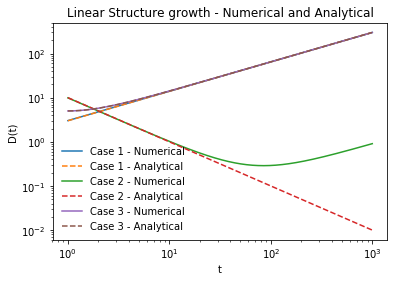

In [5]:
#D = lambda t,c1,c2 : c1*t**(2/3)+c2/t
D1 = lambda t : 3*t**(2/3)
D2 = lambda t : 10/t
D3 = lambda t : (3*t**(5/3)+2)/t
t = np.arange(1,1000+0.01,0.01)
plt.plot(t,yt1,label='Case 1 - Numerical')
plt.plot(t,D1(t),linestyle='--',label='Case 1 - Analytical')
plt.plot(t,yt2,label='Case 2 - Numerical')
plt.plot(t,D2(t),linestyle='--',label='Case 2 - Analytical')
plt.plot(t,yt3,label='Case 3 - Numerical')
plt.plot(t,D3(t),linestyle='--',label='Case 3 - Analytical')
plt.legend(frameon=False)
plt.xlabel('t')
plt.ylabel('D(t)')
plt.title('Linear Structure growth - Numerical and Analytical')
plt.xscale('log')
plt.yscale('log')

# 4. Zeldovich Approximation

Integrate up to $z=50$: 

$D(z) = \frac{5\Omega_mH_0^2}{2}H(z)\int_z^\infty\frac{1+z'}{H^3(z')}dz'$

Where: 

$H(z)^2 = H^2_0(\Omega_m(1+z)^3+\Omega_\Lambda)$


In order to avoid having to integrate up to $\infty$ we will be substituting $z = \frac{1}{a} -1$. This gives us the following equations: 


$ D(a) = \frac{5\Omega_mH_0^2}{2}H(a)\int_0^a\frac{1}{a^3H^3(a')}da'$

Where: 

$H(a) = H_0\sqrt{\frac{\Omega_m}{a^3}+\Omega_\Lambda}$

$\dot{D}(t) = \frac{dD}{da}\dot{a}$


$\frac{dD}{da} = \frac{5\Omega_mH_0^2}{2}[\frac{dH(a)}{da}I+\frac{dI}{da}H(a)]$

Where: $I = \int^a_0\frac{1}{a^3H(a)^3}da$

and $\dot{a} = \frac{H_0}{\sqrt{a}}$

So we get: 

$\dot{D}(a) = \frac{5\Omega_mH_0^3}{2\sqrt{a}}[\frac{-3\Omega_m}{2\sqrt{a^5(\Omega_m+\Omega_\Lambda a^3)}}\int^a_0\frac{1}{a^3H(a)^3}da+\frac{1}{a^3H(a)^3}H_0\sqrt{\frac{\Omega_m}{a^3}+\Omega_\Lambda}]$

In [30]:
omega_m = 0.3
omega_lambda = 0.7
H0 = 70 # km/s/Mpc

H = lambda a : H0*((omega_m*(a)**(-3)+omega_lambda))**0.5
D_prefactor = lambda a : (5*omega_m*H0**2)/2*H(a)
dIda = lambda a: 1/(a*H(a))**3
I = lambda a: utils1.romber_int(dIda,1e-12,a)
a = 1/51
D = lambda a: D_prefactor(a) * I(a)
print(D(a))

pre_fact = lambda a: 5*omega_m*H0**3/(2*a**(0.5)) 
dHda = lambda a: -3*omega_m/(2*(a**5*(omega_m+omega_lambda*a**3))**0.5)
dDdt = pre_fact(a)*(dHda(a)*I(a)+dIda(a)*H(a))
print(dDdt)

dDdt_numerical = utils1.ridders_diff(D,np.array([a]))*H0/(a)**0.5
print(dDdt_numerical)

0.01961021426458253
1239.0147426693459
[499.95564708]


In [9]:
reload(utils1)
#dHda = lambda a: -3*omega_m/(2*(a**5*(omega_m+omega_lambda*a**3))**0.5)
#dDdt = lambda a: utils1.romber_int(D_int,1e-12,a)*5/2*omega_m*H0**3*dHda(a)*H0*a**-0.5
#dDdt_analytic = dDdt(a)
#dDdt_numerical = utils1.ridders_diff(D,np.array([a]))

#print(dDdt_analytic,dDdt_numerical)

<module 'NR_a2_1_utils' from '/data1/MRP1/numerical_recipes/a2/Jupyter_Notebooks_old_scripts/NR_a2_1_utils.py'>

-0.019269322170486502


/home/vbuchem/Documents/numerical_recipes/a2/Jupyter_Notebooks_old_scripts/NR_a2_1_utils.py:16: RuntimeWarning: overflow encountered in long_scalars
  self.state = self.a*(x&(2**32-1))+(x>>32)


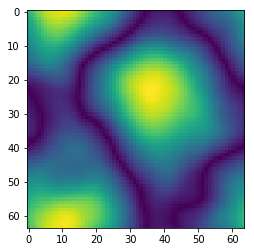

In [165]:
reload(utils3)
ck,Sx,Sy = utils3.random_field_generator_zeld(64,rng)
#ck = np.fft.ifft2(ck)
plt.imshow(np.abs(np.fft.ifft2(ck)))

In [166]:
N = 64
q = np.zeros((N,N,2))
for i in range(len(q)):
    for j in range(len(q)):
        q[i][j] = i,j
Sx = np.fft.ifft2(Sx).real*N
Sy = np.fft.ifft2(Sy).real*N

In [167]:
x = np.zeros((N,N,2))
a = np.linspace(0.0025,1,90)
Da = np.zeros(len(a))

for k in tqdm(range(0,90)):
    Da[k] = D(a[k])
    DSx = Da[k]*Sx
    DSy = Da[k]*Sy
    x[:,:,0] = (q[:,:,0]+DSx)%N
    x[:,:,1] = (q[:,:,1]+DSy)%N
            
    plt.scatter(x[:,:,0],x[:,:,1],marker='.')
    plt.title('2D N-body simulation')
    plt.ylabel('Mpc')
    plt.xlabel(f'a = {np.round(a[k],3)}')
    plt.savefig('./plots/snap%04d.png'%k)
    plt.close()

100%|██████████| 90/90 [00:12<00:00,  6.37it/s]


In [153]:
test = np.zeros((3,3,2))
#testy = np.zeros((3,3))
test_q = np.zeros((3,3,2))
test_DSx = np.ones((3,3))*2
test_DSy = np.ones((3,3))*1
for i in range(len(test_q)):
    for j in range(len(test_q)):
        test_q[i][j] = i,j

test[:,:,0] = test_q[:,:,0]+test_DSx
test[:,:,1] = test_q[:,:,1]+test_DSy

#print(test_q)
#print(test_DSx)
#print(test)

#print(test_q[:,:,0].shape)
#print(test_DSx.shape)

In [154]:
reload(utils3)
omega_m = 0.3
omega_lambda = 0.7
H0 = 70 # km/s/Mpc
reload(utils3)
ck,Sx,Sy,Sz = utils3.random_field_generator_zeld_3D(64,rng)


/home/vbuchem/Documents/numerical_recipes/a2/Jupyter_Notebooks_old_scripts/NR_a2_1_utils.py:16: RuntimeWarning: overflow encountered in long_scalars
  self.state = self.a*(x&(2**32-1))+(x>>32)


In [155]:
#print(np.fft.ifftn(Sx[22]))
#print(np.fft.ifftn(Sz[0]))
#ck = np.fft.ifft2(ck)

In [162]:
N = 64
q = np.zeros((N,N,N,3))
for i in range(N):
    for j in range(N):
        for k in range(N):
            q[i][j][k] = i,j,k
'''
qxy = q[(x[:,:,:,2]>31.5) & (q[:,:,:,2]<=32.5)]
qxz = q[(x[:,:,:,1]>31.5) & (q[:,:,:,1]<=32.5)]
qyz = q[(x[:,:,:,0]>31.5) & (q[:,:,:,0]<=32.5)]

plt.scatter(qxy[:,0],qxy[:,1],marker='.')
plt.show()

plt.scatter(qxz[:,0],qxz[:,2],marker='.')
plt.show()

plt.scatter(qyz[:,1],qyz[:,2],marker='.')
plt.show()
'''
Sx = np.fft.ifftn(Sx).real*N*1.5
Sy = np.fft.ifftn(Sy).real*N*1.5
Sz = np.fft.ifftn(Sz).real*N*1.5

In [164]:
x = np.zeros((N,N,N,3))

mask_x = (x[:,:,:,0] > 31.5) & (x[:,:,:,0] <= 32.5) 
#mask_y = (x[:,:,:,1] > 31.5) & (x[:,:,:,1] <= 32.5) 
#mask_z = (x[:,:,:,2] > 31.5) & (x[:,:,:,2] <= 32.5) 

a = np.linspace(0.0025,1,90)
Da = np.zeros(len(a))

for k in tqdm(range(0,90)):
#for k in tqdm(range(0,1)):
    Da[k] = D(a[k])
    DSx = Da[k]*Sx
    DSy = Da[k]*Sy
    DSz = Da[k]*Sz
    
    x[:,:,:,0] = (q[:,:,:,0]+DSx)%N
    x[:,:,:,1] = (q[:,:,:,1]+DSy)%N
    x[:,:,:,2] = (q[:,:,:,2]+DSz)%N
        
    xy = x[(x[:,:,:,2]>31.5) & (x[:,:,:,2]<=32.5)]
    xz = x[(x[:,:,:,1]>31.5) & (x[:,:,:,1]<=32.5)]
    yz = x[(x[:,:,:,0]>31.5) & (x[:,:,:,0]<=32.5)]
    
    plt.scatter(xy[:,0],xy[:,1],marker='.')
    plt.title('3D N-body simulation: xy')
    plt.ylabel('Mpc')
    plt.xlabel(f'a = {np.round(a[k],3)}')
    plt.savefig('./plots/3Dxy_snap%04d.png'%k)
    plt.close()
    
    plt.scatter(xz[:,0],xz[:,2],marker='.')
    plt.title('3D N-body simulation: xz')
    plt.ylabel('Mpc')
    plt.xlabel(f'a = {np.round(a[k],3)}')
    plt.savefig('./plots/3Dxz_snap%04d.png'%k)
    plt.close()
    
    plt.scatter(yz[:,1],yz[:,2],marker='.')
    plt.title('3D N-body simulation: yz')
    plt.ylabel('Mpc')
    plt.xlabel(f'a = {np.round(a[k],3)}')
    plt.savefig('./plots/3Dyz_snap%04d.png'%k)
    plt.close()

    #plt.scatter(q[:,:,0],q[:,:,1],marker='.')
#plt.show()


100%|██████████| 90/90 [00:34<00:00,  2.77it/s]


# 5.Mass assignment schemes

In [32]:
def bit_reverser64(n,width=6):
    b = '{:0{width}b}'.format(n, width=width)
    return int(b[::-1], 2)

In [33]:
a = np.arange(0,64,1)
#temp_a = np.zeros(0,8,1)
for i in range(len(a)):
    a[i] = bit_reverser64(a[i])


In [34]:
a = np.arange(0,8,1)
#print(a)
print(np.fft.fft(a))

for i in range(len(a)):
    a[i] = bit_reverser64(a[i],width=3)
N = 8
x = np.zeros(len(a),dtype=complex)

for j in range(1,np.int(np.log2(N))+1):
    Nj = 2**j
    for k in range(0,Nj-1):
        for i in range(k,N//Nj):
            m = i*Nj
            x[m] = a[m] + np.exp(2j*np.pi*k/Nj)*a[m+Nj//2]
            x[m+Nj//2] = a[m] - np.exp(2j*np.pi*k/Nj)*a[m+Nj//2]
print(x)

x = np.array([[1,2,3],[1,2,3]])
print(x[:,1])
print(x[1])

[28.+0.j         -4.+9.65685425j -4.+4.j         -4.+1.65685425j
 -4.+0.j         -4.-1.65685425j -4.-4.j         -4.-9.65685425j]
[ 1.+0.j -4.+0.j -2.+0.j -4.+0.j -1.+0.j -4.+0.j  1.-3.j -4.+0.j]
[2 2]
[1 2 3]


In [42]:
def fft1D(x,Nj,start=0,step=1):
    #if Nj%2 > 0:
    #    raise ValueError('Size of input array must be a power of 2')
    if Nj == 1: 
        return [x[start]]
    new_step = step*2
    hNj = Nj//2
    rs = fft1D(x,hNj,start,new_step)+fft1D(x,hNj,start+step,new_step)
    for i in range(hNj):
        rs[i],rs[i+hNj]=rs[i]+np.exp(-2j*np.pi*i/Nj)*rs[i+hNj],rs[i]-np.exp(-2j*np.pi*i/Nj)*rs[i+hNj]
    return rs

def fft2D(x):
    if Nj%2 > 0:
        raise ValueError('Size of input array must be a power of 2')
    x = np.array(x,dtype=complex)
    if len(x.shape) == 2:
        for i in range(x.shape[1]):
            x[:,i] = fft1D(x[:,i],len(x[1]))
        for j in range(x.shape[0]):
            x[j] = fft1D(x[j],len(x[0]))
        return x

def fft3D(x):
    if Nj%2 > 0:
        raise ValueError('Size of input array must be a power of 2')
    x = np.array(x,dtype=complex)
    for i in range(x.shape[1]):
        x[:,i] = fft2D(x[:,i],len(x[1]))
    for j in range(x.shape[0]):
        x[j] = fft2D(x[j],len(x[0]))
    return x
    
    

In [43]:
np.random.seed(42)
a1 = np.arange(0,8,1)
print(len(a1))
print(fft1D(a1,len(a1)))
print(np.fft.fft(a1))
a2 = np.random.normal(size=(8,8))
#print(fft2D(a2))
#print(np.fft.fft2(a2))
a3 = np.random.normal(size=(8,8,8))
#print(fft3D(a3))
#print(np.fft.fftn(a3))

8
[(28+0j), (-4+9.65685424949238j), (-4+4j), (-4+1.6568542494923797j), (-4+0j), (-3.9999999999999996-1.6568542494923797j), (-3.9999999999999996-4j), (-3.9999999999999987-9.65685424949238j)]
[28.+0.j         -4.+9.65685425j -4.+4.j         -4.+1.65685425j
 -4.+0.j         -4.-1.65685425j -4.-4.j         -4.-9.65685425j]
